In [1]:
import set_jupyter_env
from apiServer import *

In [2]:
API = ApiServer()

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_AEC_1d_2c_1s_4r_4w.json
1.	dc_dist_2d_3c_2s_3r_6w.json
2.	dc_fed_dist_2d_3c_2s_3r_6w.json
3.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
4.	dc_synt_12d_16w_8c_4s_4r.json
5.	dc_synt_8d_8w_2c_4s_4r.json
6.	dc_synt_8d_8w_4c_6r_4s.json
7.	dc_synt_distributed_w5_c3_6r_3s_3d.json
8.	dc_test_synt_1d_2c_1s_4r_4w.json
9.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_12d_16w_8c_4r_4s.json
1.	conn_1Router1Client1S.json
2.	conn_1Router1Client2S.json
3.	conn_1Router2Clients1S.json
4.	conn_1Router3Clients1S.json
5.	conn_1Router4Clients1S.json
6.	conn_1Router4Clients1fed.json
7.	conn_1Router4Clients2Sources.json
8.	conn_1Router4Clients2Sources1fed.json
9.	conn_2R4C1S_health_david.json
10.	conn_2Router2Clients1Source.json
11.	conn_2Router2Clients1Source_david.json
12.	conn_2Router2Clients2Source.json
13.	conn_2Router2ClientsGUI.json
14.	conn_2Router3Clients.json
15.	conn_3Router3Clients.json
16.	conn_6RouterCyc

In [4]:
dc = 4
conn = 0
exp = 4
API.setJsons(dc, conn, exp)

In [5]:
dc_path, conn_path, exp_path = API.getUserJsons()
exp_name = "12DevicesTest"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-05-23 18:54:12,116] 
Network components:
                 Receiver's Address: http://10.0.0.5:8901
                 Frequency: 300 [batches/sec]
                 Batchsize: 200 [samples]
                 devicesIp: ['10.0.0.5', '10.0.0.4', '10.0.0.9', '10.0.0.7', '10.0.0.10', '10.0.0.11', '10.0.0.8', '10.0.0.12', '10.0.0.16', '10.0.0.6', '10.0.0.13', '10.0.0.15']
                 mainServerIp: 10.0.0.5
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.5
                 apiServerPort: 8901
                 Clients: ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']
                 Workers: ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'w12', 'w13', 'w14', 'w15', 'w16']
                 Sources: ['s1', 's2', 's3', 's4']
                 Routers: ['r1', 'r2', 'r3', 'r4']
[INFO][2024-05-23 18:54:12,117] Connections:
[INFO][2024-05-23 18:54:12,118] 		 r1 : ['mainServer', 'r2', 's1', 'c1', 'c2']
[INFO][2024-05-23 18:54:12,119] 		 r2

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-05-23 18:54:14,152] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [6]:
API.send_jsons_to_devices()

[INFO][2024-05-23 18:54:14,835] Sending distributed configurations to devices is completed


In [7]:
API.run_current_experiment_phase()
stats_train = API.get_experiment_flow(exp_name).generate_stats()

[INFO][2024-05-23 18:54:14,840] Experiment phase: training_phase1 of type training starts running...
[INFO][2024-05-23 18:54:14,842] Sending data to sources
[INFO][2024-05-23 18:54:26,541] Data is ready in sources
[INFO][2024-05-23 18:54:26,542] Phase training requested from Main Server
[INFO][2024-05-23 18:54:36,822] Processing experiment phase data
[INFO][2024-05-23 18:54:36,851] Processing experiment phase data completed
[INFO][2024-05-23 18:54:36,852] Start generating communication statistics for training_phase1 of type training
[INFO][2024-05-23 18:54:36,853] Statistics requested from Main Server
[INFO][2024-05-23 18:54:37,256] Statistics received from Main Server
[INFO][2024-05-23 18:54:37,257] Phase of training_phase1 training completed


In [8]:
API.next_experiment_phase()
API.run_current_experiment_phase()
stats_pred = API.get_experiment_flow(exp_name).generate_stats()

[INFO][2024-05-23 18:54:37,263] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-05-23 18:54:37,264] Sending data to sources
[INFO][2024-05-23 18:54:44,732] Data is ready in sources
[INFO][2024-05-23 18:54:44,732] Phase prediction requested from Main Server
[INFO][2024-05-23 18:55:10,188] Processing experiment phase data
[INFO][2024-05-23 18:55:10,356] Processing experiment phase data completed
[INFO][2024-05-23 18:55:10,357] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-05-23 18:55:10,358] Statistics requested from Main Server
[INFO][2024-05-23 18:55:10,461] Statistics received from Main Server
[INFO][2024-05-23 18:55:10,462] Phase of prediction_phase prediction completed


Text(0.5, 1.0, 'Training Loss Function')

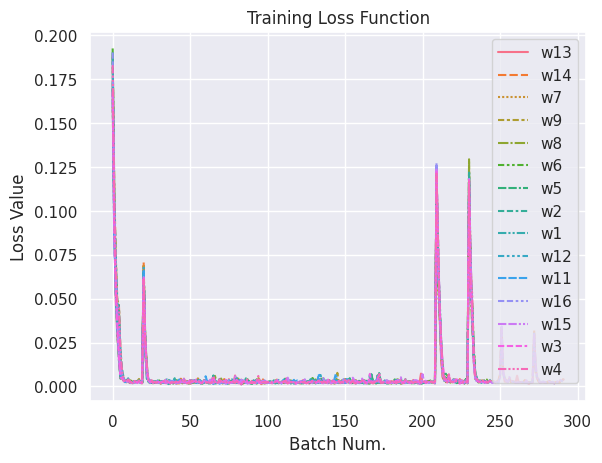

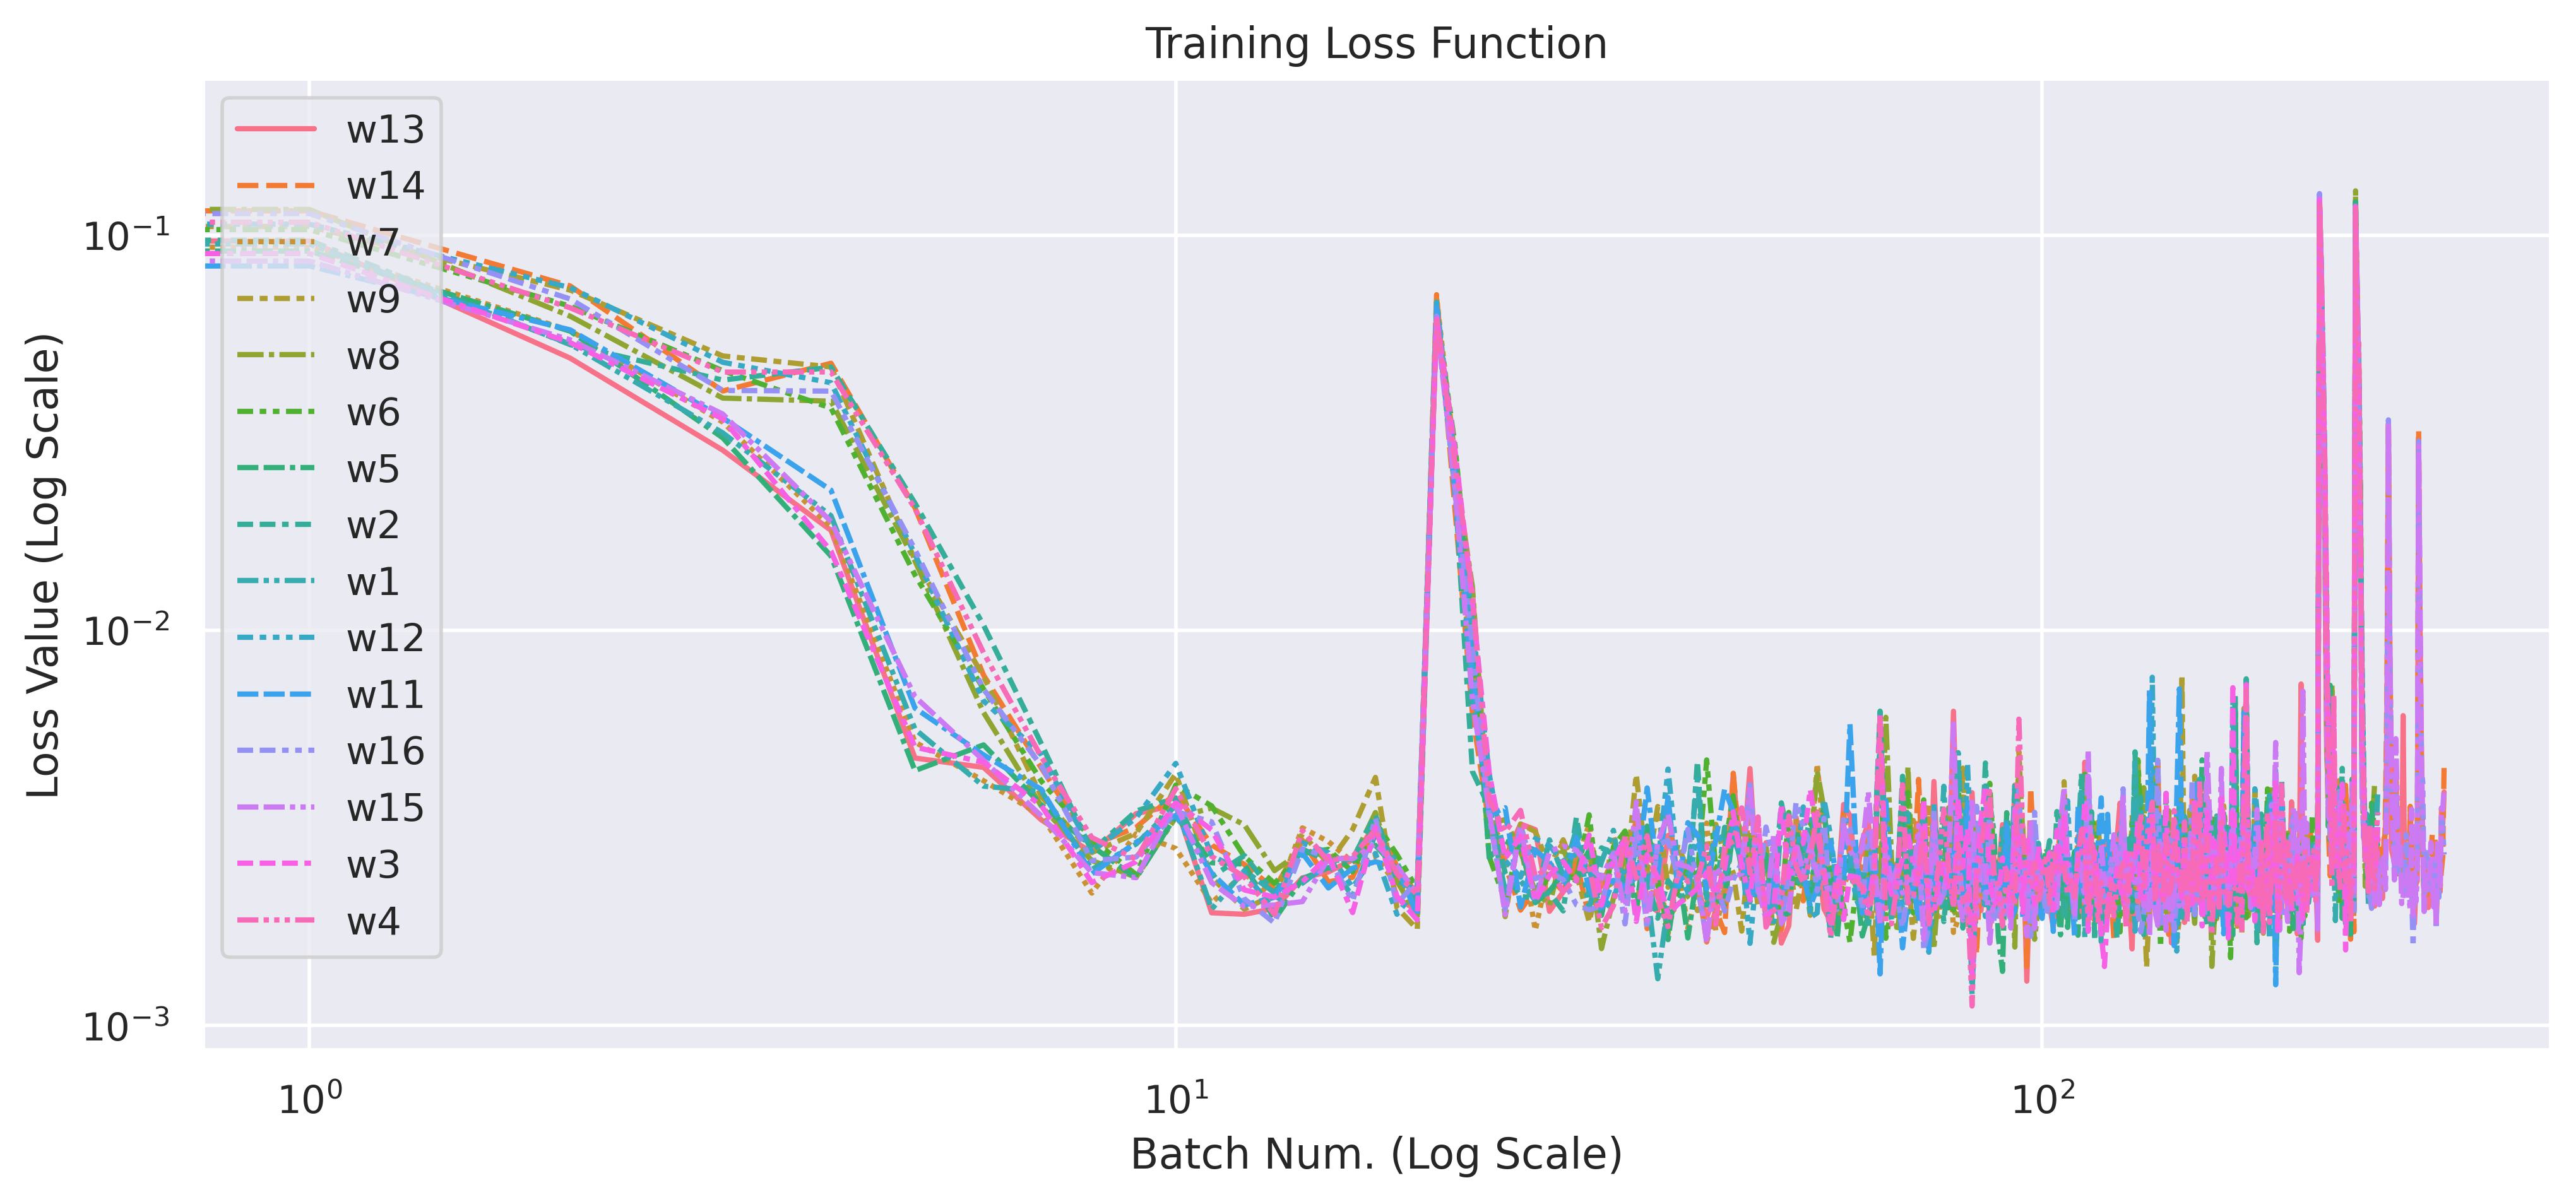

In [29]:
loss_train1 = stats_train.get_loss_ts(plot=True) # plot both regular and log scale
plt.figure(figsize=(12,5) , dpi=400)
plot = sns.lineplot(data=loss_train1)
plot.set(xscale="log" , yscale="log")
plt.xlabel('Batch Num. (Log Scale)')
plt.ylabel('Loss Value (Log Scale)')
plt.title('Training Loss Function')

/usr/local/lib/nerlnet-lib/NErlNet/src_py/apiServer/stats.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=min_loss_dict , palette='viridis')


OrderedDict([('w13', 0.0012956291902810335),
             ('w14', 0.0014102334389463067),
             ('w7', 0.0017045438289642334),
             ('w9', 0.0014035075437277555),
             ('w8', 0.0014119358966127038),
             ('w6', 0.0013801000313833356),
             ('w5', 0.0013713869266211987),
             ('w2', 0.0015027289045974612),
             ('w1', 0.0012009425554424524),
             ('w12', 0.0013819470768794417),
             ('w11', 0.0012684380635619164),
             ('w16', 0.001552197034470737),
             ('w15', 0.0013605226995423436),
             ('w3', 0.001328334677964449),
             ('w4', 0.0011206697672605515)])

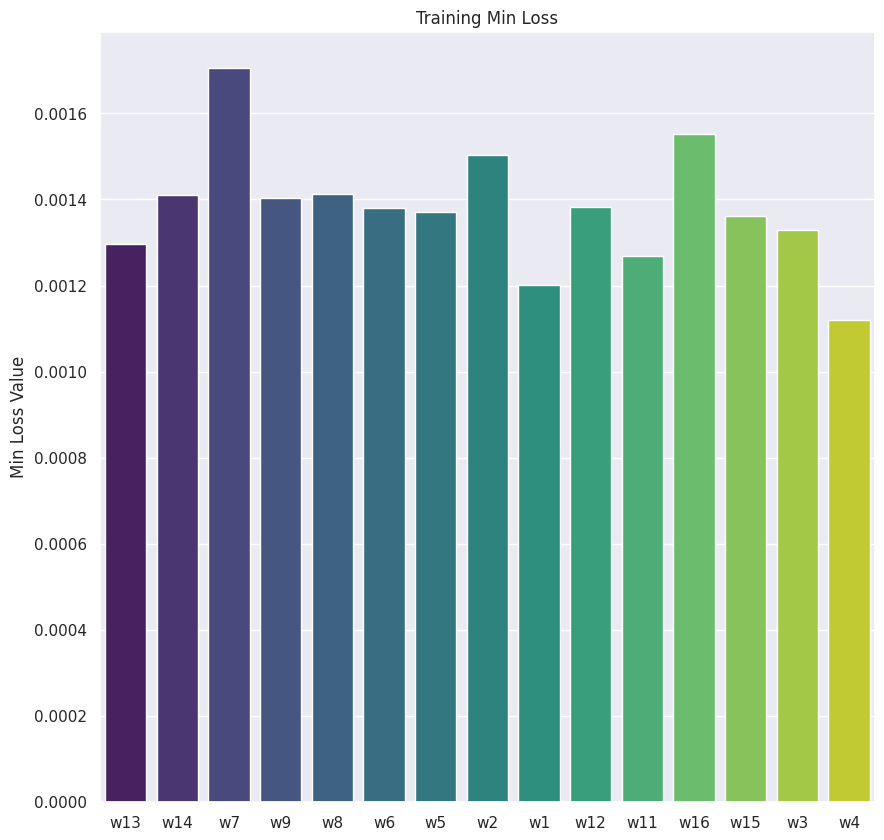

In [12]:
plt.figure(figsize=(10,10))
stats_train.get_min_loss(plot=True)

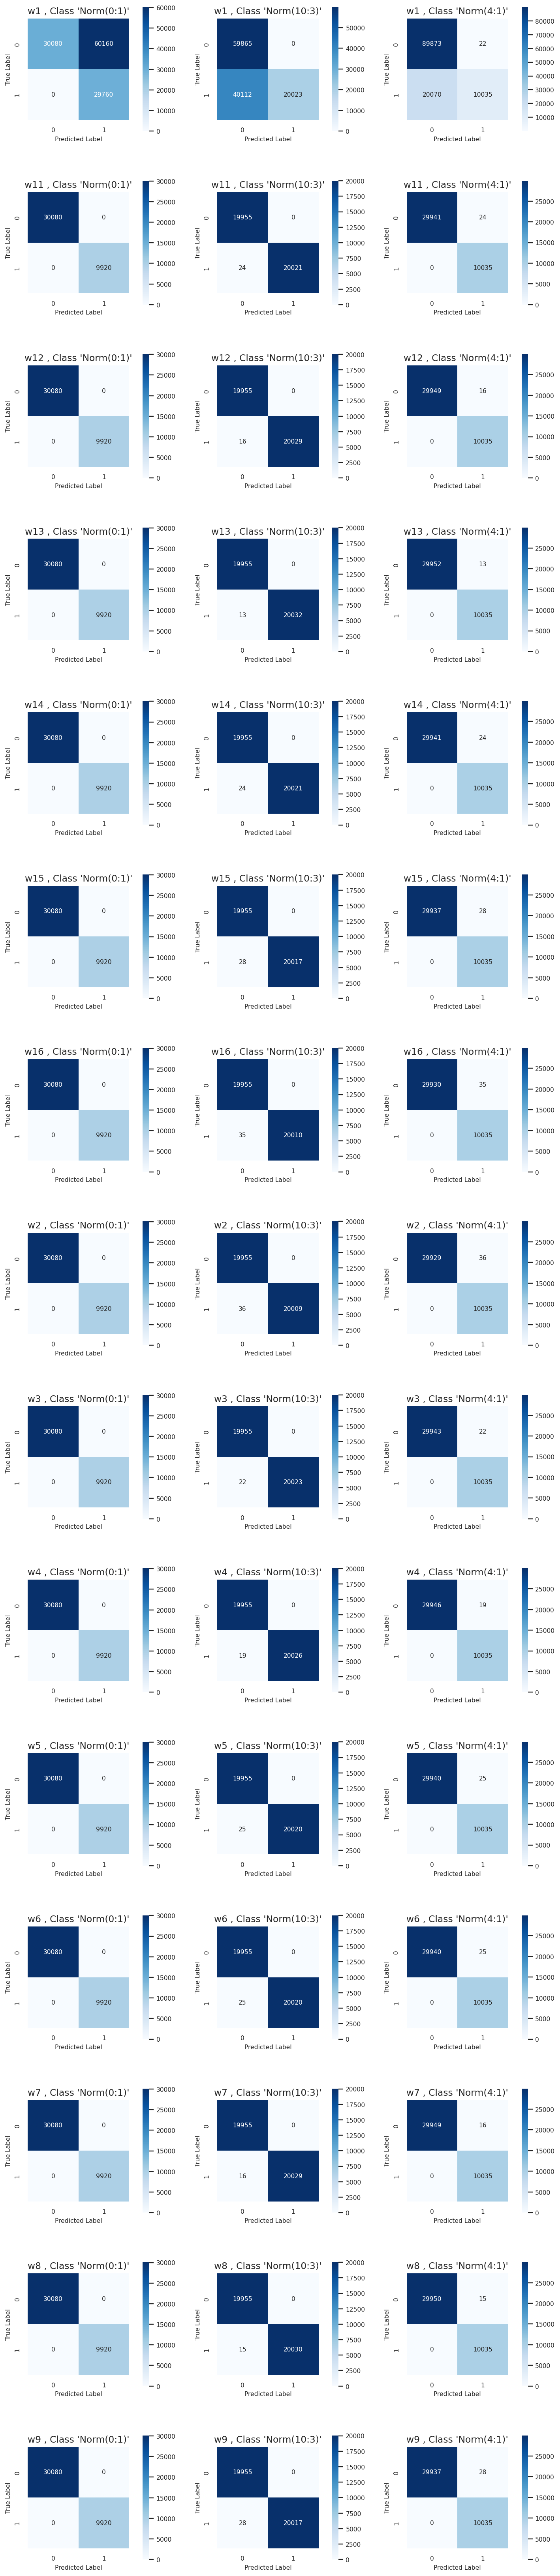

In [13]:
_ , conf_mats_workers = stats_pred.get_confusion_matrices(plot = True)

In [14]:
model_performence = stats_pred.get_model_performence_stats(conf_mats_workers , show=True)

,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w2,Norm(0:1),30080,0,0,9920,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,w2,Norm(4:1),29929,36,0,10035,0.999100,0.999399,0.996425,1.000000,0.998799,0.998799,0.998209
2,w2,Norm(10:3),19955,0,36,20009,0.999100,0.999102,1.000000,0.998204,1.000000,0.998204,0.999101
3,w1,Norm(0:1),30080,60160,0,29760,0.498667,0.666667,0.330961,1.000000,0.333333,0.333333,0.497326
4,w1,Norm(4:1),89873,22,20070,10035,0.832567,0.666544,0.997812,0.333333,0.999755,0.333089,0.499726
5,w1,Norm(10:3),59865,0,40112,20023,0.665733,0.666484,1.000000,0.332967,1.000000,0.332967,0.499588
6,w4,Norm(0:1),30080,0,0,9920,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,w4,Norm(4:1),29946,19,0,10035,0.999525,0.999683,0.998110,1.000000,0.999366,0.999366,0.999054
8,w4,Norm(10:3),19955,0,19,20026,0.999525,0.999526,1.000000,0.999052,1.000000,0.999052,0.999526
9,w3,Norm(0:1),30080,0,0,9920,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


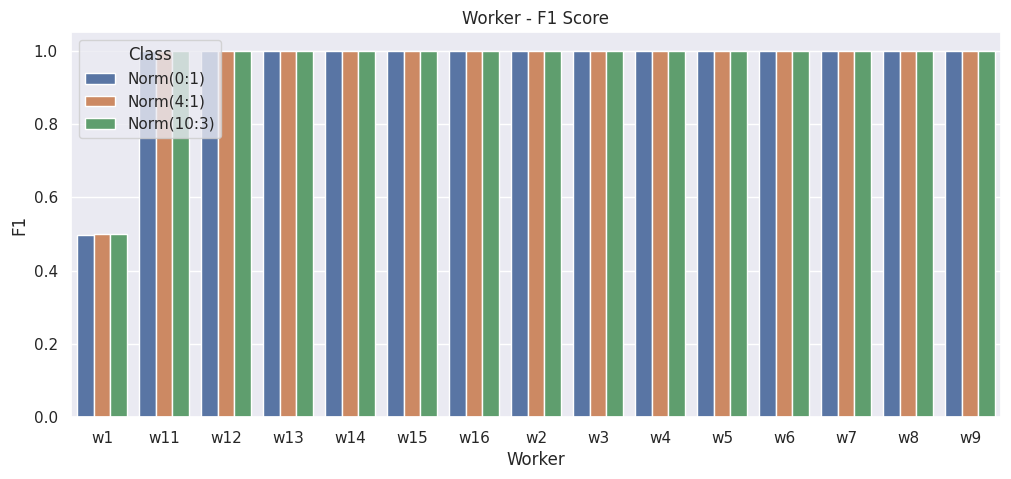

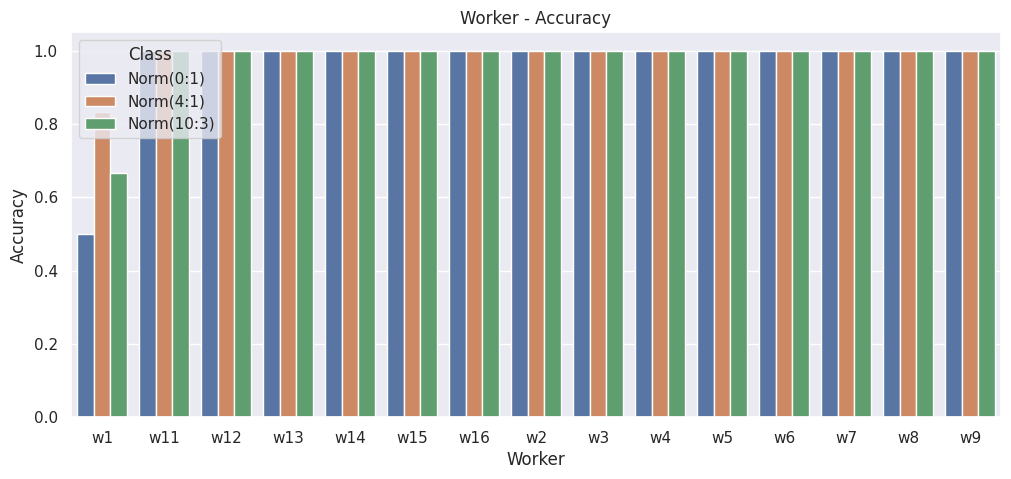

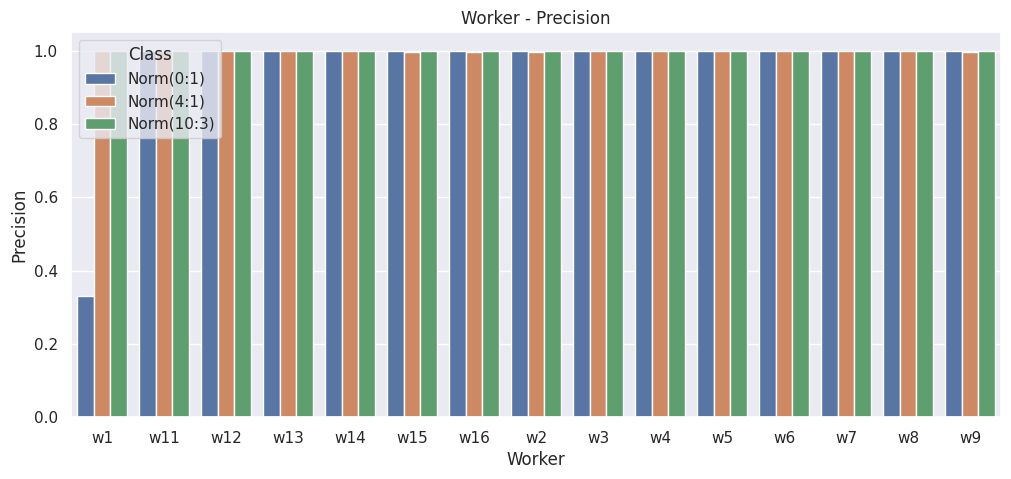

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence.sort_values('Worker') , x='Worker' , y='F1',hue='Class')
plt.title("Worker - F1 Score")
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence.sort_values('Worker') , x='Worker' , y='Accuracy',hue='Class')
plt.title("Worker - Accuracy")
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence.sort_values('Worker') , x='Worker' , y='Precision',hue='Class')
plt.title("Worker - Precision")
plt.show()

<Figure size 1200x1200 with 0 Axes>

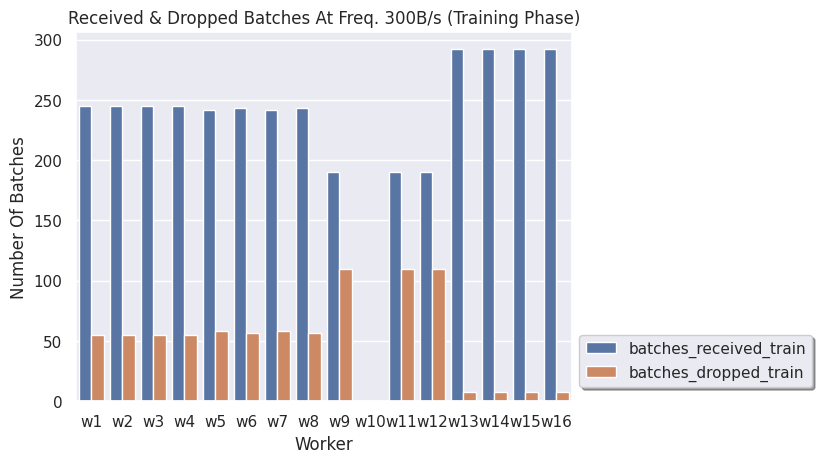

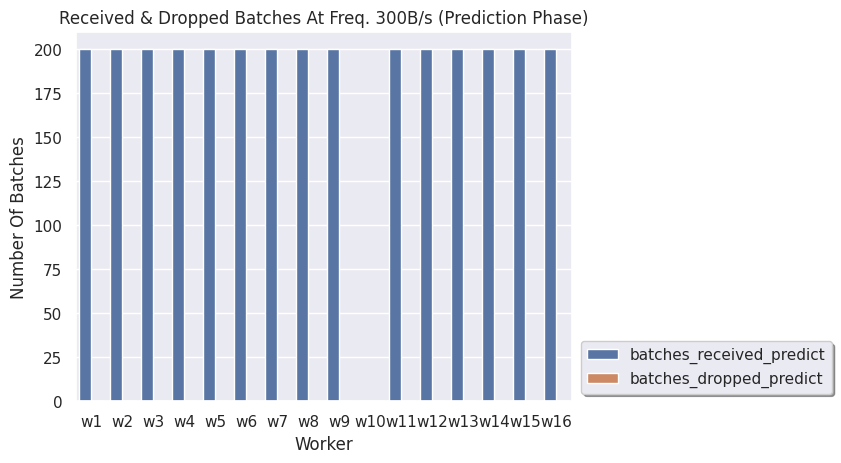

In [17]:
import pandas as pd
plt.figure(figsize=(12,12))
workers_comm_dict = stats_train.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()

workers_comm_dict_pred = stats_pred.get_communication_stats_workers()
df_pred = pd.DataFrame.from_dict(workers_comm_dict_pred)

plt.figure()
df_selected_pred = df_pred.iloc[[4,6]]
data_pred = pd.melt(df_selected_pred.reset_index(), id_vars=['index'], value_vars=df_pred.columns)
batches_stats_pred = sns.barplot(x='variable', y='value', hue='index', data=data_pred)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Prediction Phase)")
batches_stats_pred.legend(loc='lower right', bbox_to_anchor=(1.54, 0), shadow=True, ncol=1)
plt.show()

Text(0.5, 1.0, 'Routers Received & Sent Messages')

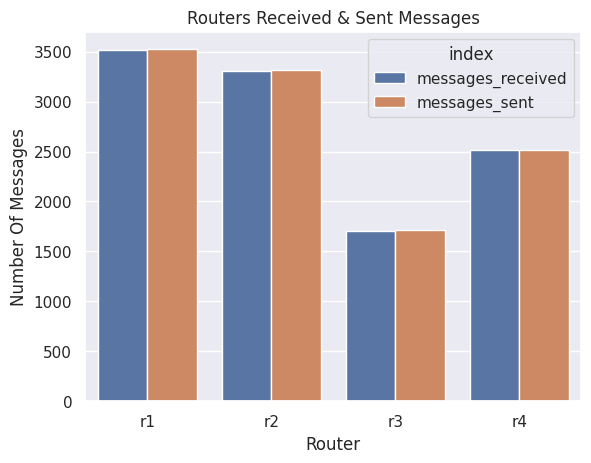

In [18]:
routers_comm_dict = stats_train.get_communication_stats_routers()
df = pd.DataFrame.from_dict(routers_comm_dict)
df_selected = df.iloc[[0,1]]
data = pd.melt(df_selected.reset_index(), id_vars=['index'], value_vars=df.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data)
plt.ylabel('Number Of Messages')
plt.xlabel('Router')
plt.title("Routers Received & Sent Messages")

In [21]:
%pip install networkx pygraphviz
import networkx as nx
def visualize_nerlnet_graph(api_server_inst,  connections : dict , components): # connections is a dictionary with keys as routers and values as lists of their neighbors
    # print("Connections: " , list(connections.items()))
    routers = list(connections.keys())
    # print("Routers: " , routers)
    workers = list(components.map_worker_to_client.keys())
    # print("Workers: " , workers)
    graph = nx.Graph()
    nodes = routers + components.sources + components.clients + workers + [API_SERVER_STR , MAIN_SERVER_STR]
    edges = [] # list of tuples
    for router , neighbors in list(connections.items()):
        for neighbor in neighbors:
            if (router,neighbor) not in edges:
                # print(f"Adding edge ({router} , {neighbor}) to graph")
                edges.append((router , neighbor))
    edges.append((API_SERVER_STR , MAIN_SERVER_STR)) # Always connected
    for worker in workers:
        edges.append((worker , components.map_worker_to_client[worker]))
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    
    my_labels = {'mainServer': 'mS' , 'apiServer': 'aS'}
    nx.relabel_nodes(graph, my_labels , copy=False)
    
    default_colors = {node:'#A90433' for node in graph.nodes()}
    node_colors = {node:default_colors[node] for node in graph.nodes()}
    nx.set_node_attributes(graph, node_colors, 'color')
    colors = nx.get_node_attributes(graph, 'color').values()

    pos = nx.nx_agraph.graphviz_layout(graph)
    angle = 100
    
    plt.figure(figsize=(8,6),dpi=150)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=colors , node_size=200, font_size=8, font_color='white' , edge_color='black' , width=1.5)
    plt.show()

Note: you may need to restart the kernel to use updated packages.


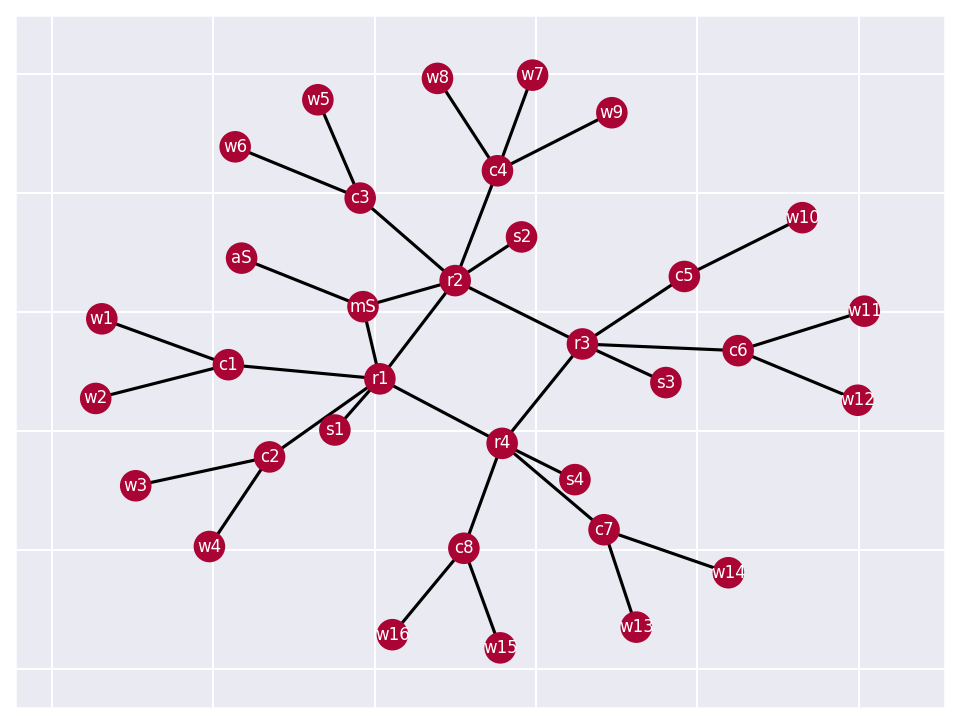

In [22]:
visualize_nerlnet_graph(API , API.json_dir_parser.json_from_path(conn_path)['connectionsMap'] , globe.components)